In [2]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO
m = GEKKO()

Cette séance de TP a pour but la prise en main d’un logiciel "boîte noire" IpOpt (Interior Point OPTimizer) permettant la résolution de problèmes d’optimisation non-linéaires à l’aide d’une méthode dite de points intérieurs.

# Préliminaires:

Résolvons de prime abord théoriquement le problème d'optimisation non-linéaire:
$$
\mathbf{J} = \inf_{(x_1,x_2)\in K} 𝑥_1² + 𝑥_2² -14𝑥_1 - 6𝑥_2 - 7
$$
où $K\subset \mathbb{R}^2$ est donné par
$$
K=\{(x_1,x_2)\in\mathbb{R}^2\mid 𝑥_1 + 𝑥_2\leq 2, \ 𝑥_1+2𝑥_2\leq 3\}.
$$

## Existence:

On pose: $$\mathbf{J} = \inf_{(x_1,x_2)\in K} \frac 1 2 <AX,X>_{\mathbb{R}^2} - <b,X>_{\mathbb{R}^2} + c$$
où l’on adopte la notation $X = (x_1, x_2) \in {\mathbb{R}^2}$

avec $A = \begin{bmatrix}
2 & 0 \\
0 & 2 
\end{bmatrix}$ 
et 
$b = \begin{bmatrix}
14 \\
6 
\end{bmatrix}$ 
et 
$c= -7$ 

* **Coercivité:**

On a $A\in \mathbf{S_2^{++}(\mathbb R)}$ Car les valeurs propres sont réels positifs (i.e. 2 double)

Donc:

$\mathbf {J(X)} \geq \frac 1 2\lambda_{min} \times 2\begin{Vmatrix} X\end{Vmatrix}^2
- \begin{Vmatrix} b\end{Vmatrix} \begin{Vmatrix} X\end{Vmatrix}$ 


où $λ_{min} > 0$ désigne la plus petite valeur propre de A.

Alors: 

$$\mathbf {J(X)} \geq \underbrace {\begin{Vmatrix} X\end{Vmatrix}^2
- \begin{Vmatrix} b\end{Vmatrix} \begin{Vmatrix} X\end{Vmatrix}}_{\lim_{\begin{Vmatrix} X\end{Vmatrix}\to\infty} \mathbf {J(X)} \to \infty}$$ 

Ainsi $\mathbf J $ est coercive.

* **Continuité:**

On remarque que $\mathbf {J(X)}$ est $C^∞$ (donc $C^0$) car polynomiale. En particulier, elle est continue sur l’ensemble:
$$
K=\{(x_1,x_2)\in\mathbb{R}^2\mid 𝑥_1 + 𝑥_2\leq 2, \ 𝑥_1+2𝑥_2\leq 3\}
$$


* **K est fermé:**
$$K=\{(x_1,x_2)\in\mathbb{R}^2\mid 𝑥_1 + 𝑥_2\leq 2, \ 𝑥_1+2𝑥_2\leq 3\}$$ $$= g_1^{-1}(] − ∞, 0]) \bigcap g_2^{-1}(]−∞,0]).$$

avec: $g_1 : R^2 \ni X →  x_1 + x_2-2 , g_2 : R^2 \ni X → x_1 + 2x_2 − 3$

Puisque $g_1$ et $g_2$ sont continues alors $g_1^{-1}(] − ∞, 0])$ et $g_2^{-1}(] − ∞,0])$ sont fermés et l'intersection l'est également.

## Unicité:

* **K convexe:**

On remarque que $\mathbf K$ est convexe.

en effet, si $$X,Y \in \mathbf {K} \quad et \quad t ∈ [0, 1]$$  alors on a d’une part $$t · x_1 + (1 − t) · y_1 + t · x_2 + (1 − t) · y_2\leq t · 2 + (1 − t) · 2 = 2$$ 

et d’autre part $$t · x_1 + (1 − t) · y_1 + 2 . t · x_2 + 2.(1 − t) · y_2\leq t · 3 + (1 − t) · 3 = 3$$

donc $$t.X + (1-t).Y \in \mathbf {K} $$

* **J strictement convexe:**

On a $\mathbf{Hess} \,J(X) = A$ et cette matrice est définie positive . Par conséquent, la fonction J est strictement convexe sur le convexe K, d’où l’unicité du minimiseur de J sur K

## Résolution: théorème de Kuhn–Tucker

Soit $X^*=(x_1,x_2)$ le minimiseur de J sur K. Puisque $g_1 et g_2$ sont des application affine alors les contraintes sont qualifiés en $X^*$  

Le théorème de Kuhn–Tucker fournit donc l’existence de µ ∈ R+ tels
que :

$$ \mathbf (P) \quad \left\{\begin{array}{ll} 
      ∇ J(x^∗) + µ_1∇g_1(x^∗) + µ_2∇g_2(x^∗) = 0_{\mathbb {R²}} \\
      g_1(X^*) \leq 0 \\
      g_2(X^*) \leq 0 \\
      µ_1 g_1(X^*) = 0 \\
      µ_2 g_2(X^*) = 0 \\
      µ_1,µ_2 \geq 0
      \end{array}
    \right.$$
    
$$ \mathbf (P) \iff   \quad \left\{\begin{array}{ll} 
      (1) \quad 2x_1 -14 + \mu_1 +\mu_2 = 0 \\
      (2) \quad 2x_2 -6 + \mu_1 +2\mu_2 = 0 \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad µ_1 (x_1 + x_2-2) = 0 \\
      (6) \quad µ_2 (x_1 + 2x_2 − 3) = 0 \\
      (7) \quad µ_1,µ_2 \geq 0
      \end{array}
    \right.$$
    
Procédons par disjonction des cas à partir de la condition (5) (complémentarité des contraintes) :

**$1^{er}$ cas:**

Si $\underline{\mu_1 = 0} $ on distingue deux sous cas par disjonction des cas à partir de la condition (6)
* **Sous cas 1:**
    Si $\underline{\mu_2 = 0} $
    
 $$ \mathbf (P) \implies   \quad \left\{\begin{array}{ll} 
      (1) \quad 2x_1 -14  = 0 \\
      (2) \quad 2x_2 -6  = 0 \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad µ_1  = 0 \\
      (6) \quad µ_2  = 0 \\
      (7) \quad µ_1,µ_2 \geq 0
      \end{array}
    \right.$$
    
    $$ \implies   \quad \left\{\begin{array}{ll} 
      (1) \quad x_1  = 7 \\
      (2) \quad x_2  = 3 \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad µ_1  = 0 \\
      (6) \quad µ_2  = 0 
      \end{array}
    \right.$$
    
En reportant (1) et (2) dans (3) et (4) on obtient:
$$ \quad \left\{\begin{array}{ll} 
      (3) \quad 8 \leq 0 \\
      (4) \quad 10\leq 0 
      \end{array}
    \right.$$

ce qui est absurde alors ce cas est **exclu**.

* **Sous cas 2:**
    Si $\underline{(x_1 + 2x_2 − 3)=0} $
    
 $$ \mathbf (P) \implies   \quad \left\{\begin{array}{ll} 
      (1) \quad 2x_1 -14  +\mu_2 = 0 \\
      (2) \quad 2x_2 -6 +2\mu_2 = 0 \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad µ_1  = 0 \\
      (6) \quad (x_1 + 2x_2 − 3)  = 0 \\
      (7) \quad µ_1,µ_2 \geq 0
      \end{array}
    \right.$$
    
    $$ \implies   \quad \left\{\begin{array}{ll} 
      (1) \quad x_1  = \frac {19} {3} \\
      (2) \quad x_2  = \frac {5} {3}  \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad µ_1  = 0 \\
      (6) \quad (x_1 + 2x_2 − 3)  = 0 
      \end{array}
    \right.$$
    
En reportant (1) et (2) dans (3) et (4) on obtient:
$$ \quad \left\{\begin{array}{ll} 
      (3) \quad 8 \leq 0 \\
      (4) \quad \frac {29} {3}\leq 0 
      \end{array}
    \right.$$

ce qui est absurde alors ce cas est aussi **exclu**.
    
**$2^{éme}$ cas:**

Si $\underline{(x_1 + x_2-2) = 0} $ on distingue deux sous cas par disjonction des cas à partir de la condition (6)
* **Sous cas 1:**
    Si $\underline{\mu_2 = 0} $
    
$$ \mathbf (P) \implies   \quad \left\{\begin{array}{ll} 
      (1) \quad 2x_1 -14 + \mu_1 = 0 \\
      (2) \quad 2x_2 -6 + \mu_1  = 0 \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad (x_1 + x_2-2) = 0 \\
      (6) \quad µ_2  = 0 \\
      (7) \quad µ_1,µ_2 \geq 0
      \end{array}
    \right.$$
    
$$ \implies  \quad \left\{\begin{array}{ll} 
      (1) \quad x_1  = 3\\
      (2) \quad x_2  = -1 \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad µ_1  = 8 \\
      (6) \quad µ_2  = 0 
      \end{array}
    \right.$$
    
En reportant (1) et (2) dans (3) et (4) on obtient:
$$ \quad \left\{\begin{array}{ll} 
      (3) \quad 0 \leq 0 \\
      (4) \quad -2\leq 0 
      \end{array}
    \right.$$

ce qui est valable alors ce cas est **accepté**.
    
* **Sous cas 2:**
    Si $\underline{(x_1 + 2x_2 − 3)} $
    
$$ \mathbf (P) \implies   \quad \left\{\begin{array}{ll} 
      (1) \quad 2x_1 -14  +\mu_1+\mu_2 = 0 \\
      (2) \quad 2x_2 -6 +\mu_1+2\mu_2 = 0 \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad µ_1  = 0 \\
      (6) \quad (x_1 + 2x_2 − 3)  = 0 \\
      (7) \quad µ_1,µ_2 \geq 0
      \end{array}
    \right.$$
    
$$ \implies   \quad \left\{\begin{array}{ll} 
      (1) \quad \mu_1  = -12 \\
      (2) \quad \mu_2  = 8  \\
      (3) \quad x_1 + x_2-2 \leq 0 \\
      (4) \quad x_1 + 2x_2 − 3\leq 0 \\
      (5) \quad x_1  = 1 \\
      (6) \quad x_2  = 1 \\
      (7) \quad µ_1,µ_2 \geq 0
      \end{array}
    \right.$$
    
ce qui est absurde car $ µ_1,µ_2 \geq 0$ alors ce cas est aussi **exclu**.

**Conclusion:**

Il y a qu'un seul cas accepté, celui où: 
$$\mathbf{(Kuhn–Tucker)} \implies \quad \fbox{$\left\{\begin{array}{ll} 
       x_1  = 3\\
       x_2  = -1 \\
       µ_1  = 8 \\
       µ_2  = 0 
      \end{array}
    \right.$}$$

Et on obtient le même résultat à virgule flottante prés à partir du package **GEKKO** présenté ci-dessous:

$$\mathbf{(GEKKO)} \implies \quad \fbox{$\left\{\begin{array}{ll} 
       x_1  = 2.9999999999 \sim 3\\
       x_2  = -1.0000000066 \sim -1 
     \end{array}
        \right.$}$$


## Résolution numérique:

In [8]:
# Initialize Model
m = GEKKO(remote=True)

#initialize variables
x1,x2 = [m.Var() for i in range(2)]

#initial values
x1.value = 0
x2.value = 0

#Equations
m.Equation(x1 + x2 <= 2)
m.Equation(x1 + 2*x2 <= 3)

#Objective
m.Obj(x1*x1 +x2*x2-14*x1 - 6*x2 -7)

#Set global options
m.options.IMODE = 3 #steady state optimization

#Solve simulation
m.solve(disp=False) # solve on public server

#Results
print('')
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))


Results
x1: [2.9999999999]
x2: [-1.0000000066]


# Problèmes de contrôle optimal à résoudre numériquement

## Problème de temps minimal. (contrôle d’un tram, 1ère version) 

On veut déterminer le contrôle $u(·)$ et le temps minimal $T$ nécessaire pour que la solution $(x, y)$ du système contrôlé:

$$ \left\{\begin{array}{ll} 
      x'(t) =y(t) \quad t∈]0, T[ \\
      y'(t) =u(t) \quad t∈]0, T[ \\
      x(0) = y(0) = 0 
      \end{array}
    \right.$$

satisfasse $x(T) = 0$, $y(T) = -1$, sous la contrainte $|u(t)| \leq 1$ p.p. $t \in ]0,T[$.

Final Time: 0.1000000074


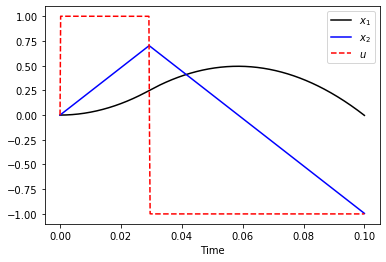

In [14]:
m = GEKKO() # initialize GEKKO
nt = 501
penalty=1e5
m.time = np.linspace(0.1,2.5,nt)

# Variables
x1 = m.Var(value=0.0)
x2 = m.Var(value=0.0)

p = np.zeros(nt) # final time = 1
p[-1] = 1.0
final = m.Param(value=p)
# optimize final time
tf = m.FV(value=2.0,lb=0.1,ub=20.0)
tf.STATUS = 1
# control changes every time period
u = m.MV(value=0,lb=-1,ub=1)
u.STATUS = 1
m.Equation(x1.dt()==x2)
m.Equation(x2.dt()==u)

m.Obj(tf+penalty*(x1*final)**2+penalty*(x2*final+1)**2)
m.options.IMODE = 6
m.solve(disp=False)
print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x1.value,'k-',label=r'$x_1$')
plt.plot(tm,x2.value,'b-',label=r'$x_2$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()

## Problème de temps minimal. (contrôle d’un tram, 2ème version).

Modifier le problème pour minimiser une combinaison convexe du temps final et de: $$ \hat J(u) = \frac{1}{2}\int_0^T ( \dot x'(t)^2 + x(t)^2) dt$$
et pour avoir 
$$ \left\{\begin{array}{ll} 
      x(T) = 0\\
      y(T) \in [-1-\epsilon, -1+\epsilon] 
      \end{array}
    \right.$$

où $\epsilon > 0$ est un paramètre fixé par l'utilisateur.

**Préparation GEKKO:**

Afin de faire calculer l'intégrale par Gekko, sans s'embarrasser avec des formules de quadrature, on reformule le problème en
$$
\inf_{u\in \mathcal{U}}\hat J(u)
$$
où on pose:
$$
\hat J(u) = x_3
$$
et $(x_1,x_2)$ résout le système d'EDO:
$$ \left\{\begin{array}{ll} 
      x_1'(t) =x_2(t) \quad t∈]0, T[ \\
      x_2'(t) =u(t) \quad t∈]0, T[ \\
      x_1(T) = 0\\
      x_2(T) \in [-1-\epsilon, -1+\epsilon] 
      \end{array}
    \right.$$
On pose les variables d'états pour GEKKO comme suite:
$$x_1 = x(t), \, x_2 = y(t) \,$$ et pour le calcul d'intégrale $$\, x_3'=\frac12 x'(t)^2 + x(t)^2 $$

En effectuant le changement de variable $t=T \tau$ avec $\tau \in [0,1]$, ainsi que les fonctions $\tilde x_1$, $\tilde x_2$, $\tilde x_3$ définies sur $[0,1]$ par
$$
\tilde x_i(\tau)=x_i(T\tau), \quad i=1,2,3.
$$
et:

$$
\tilde x'_i(\tau)=Tx_i(\tau), \quad i=1,2,3.
$$

Le problème devient :
$$
\min_{(T,\tilde u)\in \mathcal{U}}T
$$
où
$$
\mathcal{U}=\{(T,\tilde u)\in \mathbb{R}_+\times L^\infty(]-1,1[])\mid -1\leq u(\cdot)\leq 1\text{ et }\tilde x_1(1)=0, \, \tilde x_2(1) \in [-1-\epsilon, -1+\epsilon] \},
$$
avec $(\tilde x_1,\tilde x_2,\tilde x_3)$ solution du système:

$$ \left\{\begin{array}{ll} 
      \tilde x_1'(t) =T \tilde x_2(t) \quad t∈]0, 1[ \\
      \tilde x_2'(t) =T \tilde u(t) \quad t∈]0, 1[ \\ 
      \tilde x_3'=T \big(\frac12 \tilde x'(t)^2 + \tilde x(t)^2 \big)
      \end{array}
    \right.$$
    
où $\epsilon > 0$ est un paramètre fixé par l'utilisateur.

Final Time: 1.443489621


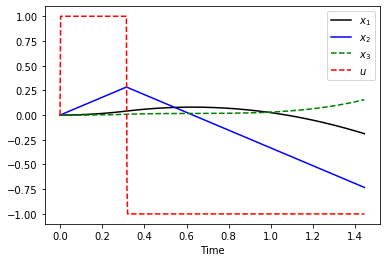

In [4]:
m = GEKKO(remote=False) # initialize GEKKO
nt = 501
penalty_time=1
penalty_constraints=1e5
eps=0.0
m.time = np.linspace(0.1,1,nt)

# Variables
x1 = m.Var(value=0.0)
x2 = m.Var(value=0.0)
x3 = m.Var(value=0.0)

p = np.zeros(nt) # final time = 1
p[-1] = 1.0
final = m.Param(value=p)
# optimize final time
tf = m.FV(value=2.0,lb=0.1,ub=20.0)
tf.STATUS = 1
# control changes every time period
u = m.MV(value=0,lb=-1,ub=1)
u.STATUS = 1
m.Equation(x1.dt()==x2*tf)
m.Equation(x2.dt()==u*tf)
m.Equation(x3.dt()==tf*0.5*(x1.dt()**2+x1**2))
m.Obj(penalty_time*tf+ penalty_constraints*(x3*final)**2+penalty_constraints*(x1*final)**2+\
      penalty_constraints*m.max2(0,x2*final+1-eps)**2 + penalty_constraints*m.max2(0,-x2*final-1-eps)**2  )#+penalty*(x1*final)**2+penalty*(x2*final+1+eps)**2+penalty*(x2*final+1-eps)**2)

m.options.IMODE = 6
m.solve(disp=False)
print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0.,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x1.value,'k-',label=r'$x_1$')
plt.plot(tm,x2.value,'b-',label=r'$x_2$')
plt.plot(tm,x3.value,'g--',label=r'$x_3$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()

# Contrôle d’insectes:

Pour traiter une population $x(0)$ d’insectes nuisibles, on introduit dans l’écosystème une population $y(0)$ d’insectes prédateurs (non nuisibles), se nourrissant des nuisibles. On suppose que les prédateurs que l’on introduit se reproduisent, de manière proportionnelle au nombre de nuisibles. Le contrôle $u()$ est le taux de disparition des prédateurs. Pour simplifier l’écriture on normalise les variables de façon à ce qu’aucune constante biologique n’intervienne dans l’écriture du système. Le modèle s’écrit alors

$$ \left\{\begin{array}{ll} 
      x_1'(t) =x_1(t)(1-x_2(t)) \quad t∈]0, T[ \\
      x_2'(t) =-x_2(t)(u(t)-x_1(t)) \quad t∈]0, T[ \\ 
      x(0)=1,y(0)=4
      \end{array}
    \right.$$
    
où le contrôle u(t) vérifie la contrainte ponctuelle : 

$$1 \leq u(t) \leq 3 \, p.p. t ∈ [0, T ].$$

## Question 1:

Démontrer que, pour tout contrôle u, alors x(t) > 0 et y(t) > 0 sur [0, T].

Soit ($\tilde x(t), \tilde y(t)$) tel que:
$$ \left\{\begin{array}{ll} 
      \tilde x(t) =0 \quad t∈]0, T[ \\
      \tilde y'(t) =\tilde y(t)u(t) \quad t∈]0, T[ \\ 
      \end{array}
    \right.$$
    
une trajectoire particulière associé aux conditions initiales:

$$\tilde x(0)=0,\quad \tilde y(0)=4$$

Si $\exists t_0 > 0$ tel que $x(t_0) = 0$ alors x résout:

$$ \left\{\begin{array}{ll} 
      x'(t) =x(t)(1-y(t)) \quad t∈]0, T[ \\
      y'(t) =-y(t)(u(t)-x(t)) \quad t∈]0, T[ \\ 
      x(t_0)=0,y(t_0)=4
      \end{array}
    \right.$$
    
Or, ($\tilde x(t), \tilde y(t)$) est une solution particulière. par unicité dans Cauchy-lipschitz:

$x(t) = \tilde x(t)=0$ et $y(t) = \tilde y(t)$

Ce qui contredit $x(0) = 1 > 0$

C'est absurde, donc x(t) ne s'annule jamais, continue et $x(0) = 1 > 0$.

on en déduit que:
$$x(t) > 0, \quad t \in [0,T]$$

Même raisonemment pour montrer $$y(t) > 0, \quad t \in [0,T]$$

En posant la solution particulière:

Soit ($\tilde x(t), \tilde y(t)$) tel que:
$$ \left\{\begin{array}{ll} 
      \tilde x(t) =\tilde x(t) \quad t∈]0, T[ \\
      \tilde y(t) =0 \quad t∈]0, T[ \\ 
      \end{array}
    \right.$$
    
une trajectoire particulière associé aux conditions initiales:

$$\tilde x(0)=\tilde x0,\quad \tilde y(0)=0$$

Si $\exists t_0 > 0$ tel que $y(t_0) = 0$ alors y résout:

$$ \left\{\begin{array}{ll} 
      x'(t) =x(t)(1-y(t)) \quad t∈]0, T[ \\
      y'(t) =-y(t)(u(t)-x(t)) \quad t∈]0, T[ \\ 
      x(t_0)=\tilde x0,y(t_0)= 0
      \end{array}
    \right.$$
    
Or, ($\tilde x(t), \tilde y(t)$) est une solution particulière. par unicité dans Cauchy-lipschitz:

$y(t) = \tilde y(t)=0$ et $x(t) = \tilde x(t)$

Ce qui contredit $y(0) = 4 > 0$

C'est absurde, donc y(t) ne s'annule jamais, continue et $y(0) = 4 > 0$.

on en déduit que:
$$y(t) > 0, \quad t \in [0,T]$$


## Question 2:

On rappelle que, de manière générale, un point d’équilibre d’un système de contrôle:
$$x'(t) =f(x(t), u(t))$$ est un couple $(x_e, u_e)$ (indépendant du temps) tel que $f(x_e, u_e) = 0.$


**Donner tous les points d’équilibre du système dans le cadran x > 0, y > 0 (et les représenter sur un graphique dans ce quadrant).**

Soit $(X_e,u_e)$ un point d'équilibre, donc on a:

$$f(X_e(t),u_e(t)) = (x_e(t)(1-x_e(t)), y_e(t)(u_e(t)-x_e(t))$$

$$\implies \left\{\begin{array}{ll} 
      x_e(t)(1-y_e(t))=0\\
      y_e(t)(u_e(t)-x_e(t))=0 \\ 
      \end{array}
    \right.$$
     
On a, $x(t)> 0$ et $y(t)> 0$
alors $$y_e = 1$$
On injecte dans la deuxième equation:
$$x_e = u_e$$

où le contrôle $u_e$ vérifie la contrainte ponctuelle : 

$$1 \leq u(t) \leq 3 \, p.p. t ∈ [0, T ].$$

$$x_e = u_e,y_e = 1 $$

On trace:

$$ \left\{\begin{array}{ll} 
      x_e = u_e \\
      y_e = 1\\
      1 \leq u_e \leq 3 \, p.p. t ∈ [0, T ]. \\ 
      \end{array}
    \right.$$
    

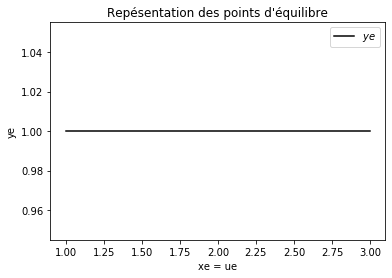

In [15]:
plt.figure(1)
ue = np.linspace(1,3,100)
xe = ue
ye = np.ones(len(ue))
plt.plot(xe,ye,'k-',label=r'$ye$')
plt.title("Repésentation des points d'équilibre")
plt.legend(loc='best')
plt.xlabel('xe = ue')
plt.ylabel('ye')
plt.show();

**Commentaire:**
    
On peut avoir une population nuisible qui varie entre 1 et 3 en injectant à un temps $t\in ]0,T[$ une population predatuer de population 1.

## Question 3:

Tracer le portrait de phase de ce système (champ de vecteurs et trajectoires) en l’absence
de contrôle (u(·) = 0) et pour le choix de contrôle u(·) = 2.

On trace alors:
$$ \left\{\begin{array}{ll} 
      x'(t) =x(t)(1-y(t)) \quad t∈]0, T[ \\
      y'(t) =y(t)x(t) \quad t∈]0, T[ \\ 
      x(0)=1,y(0)=4
      \end{array}
    \right.$$

**Pour u = 0:**

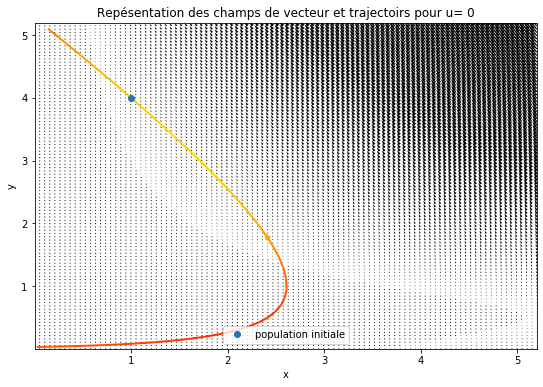

In [51]:
u = 0
x,y = np.meshgrid(np.linspace(0.001, 5.2, 100), np.linspace(0.001, 5.2, 100))
#x,y = np.meshgrid(np.linspace(-5, 7, 100), np.linspace(-5, 7, 100))
X = x*(1-y)
Y = -y*(u-x)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([1], [4], 'o', label="population initiale")
seed_points = np.array([[1], [4]])
plt.streamplot(x, y, X, Y, color=X, linewidth=2, cmap='jet',start_points=seed_points.T)
q = ax.quiver(x,y,X,Y)
plt.title("Repésentation des champs de vecteur et trajectoirs pour u= 0")
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

**Pour u = 2:**

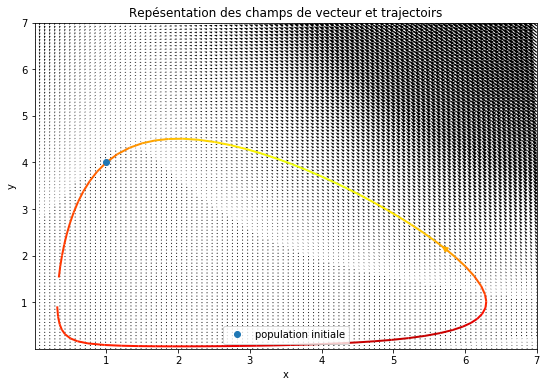

In [49]:
u = 2
x,y = np.meshgrid(np.linspace(0.001, 7, 100), np.linspace(0.001, 7, 100))
X = x*(1-y)
Y = -y*(u-x)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([1], [4], 'o', label="population initiale")
seed_points = np.array([[1], [4]])
plt.streamplot(x, y, X, Y, color=X, linewidth=2, cmap='jet',start_points=seed_points.T)
q = ax.quiver(x,y,X,Y)
plt.title("Repésentation des champs de vecteur et trajectoirs")
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

**Commentaire:**

Pour u=0, il faut injecter plus de population non nuisible pour diminuer la population nuisible. Alors que pour u= 2, la diminution de la population nuisible peut être atteinte avec moins de population non nuisible. Mais on arrive pas au point d'équilibre.


## Contrôle optimal de ce système.

On demande de résoudre numériquement le problème de contrôle
optimal: 
    
$$inf_u \left\{T | x(T) = a, y(T) = 1\right\}$$

où a ∈ [1, 3] est donné.

Tracer la fonction de contrôle obtenue et la trajectoire optimale associée. Commenter les résultats obtenus

Final Time: 0.1


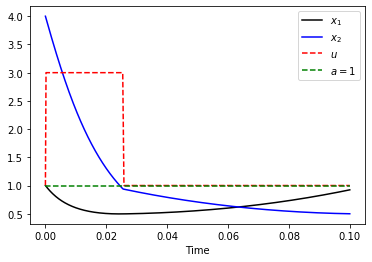

Final Time: 0.1


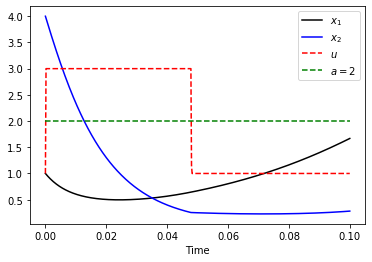

Final Time: 0.1


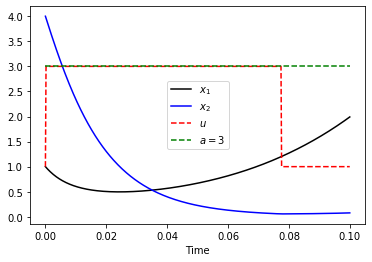

Final Time: 0.1


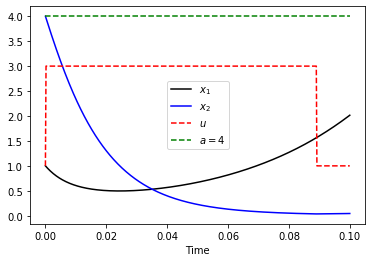

Final Time: 0.1


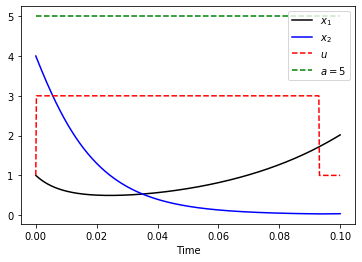

In [87]:
for a in [1,2,3,4,5]:  
    m = GEKKO(remote=False) # initialize GEKKO
    nt = 501
    penalty=1e5
    m.time = np.linspace(0.1,2.5,nt)
    #a=2 #parametere a modifier

    # Variables
    x1 = m.Var(value=1.0)
    x2 = m.Var(value=4.0)

    p = np.zeros(nt) # final time = 1
    p[-1] = 1.0
    final = m.Param(value=p)
    # optimize final time
    tf = m.FV(value=2.0,lb=0.1,ub=20.0)
    tf.STATUS = 1
    # control changes every time period
    u = m.MV(value=0,lb=1,ub=3)
    u.STATUS = 1
    m.Equation(x1.dt()==x1*(1-x2))
    m.Equation(x2.dt()==-x2*(u-x1))

    m.Obj(tf+penalty*(x1*final-a)**2+penalty*(x2*final-1)**2)
    m.options.IMODE = 6
    m.solve(disp=False)
    print('Final Time: ' + str(tf.value[0]))
    tm = np.linspace(0,tf.value[0],nt)
    plt.figure(1)
    plt.plot(tm,x1.value,'k-',label=r'$x_1$')
    plt.plot(tm,x2.value,'b-',label=r'$x_2$')
    plt.plot(tm,u.value,'r--',label=r'$u$')
    plt.plot(tm,a*np.ones(len(tm)),'g--',label=r'$a=$'+str(a))
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.show()

**Commentaire:**
    
La contrainte final de y n'est pas vraiment réspecté pour n'importe quelle valeur de a . Donc on peut pas atteindre l'équilibre.

### le coût $L^2$:

On souhaite modifier le problème et inclure dans le critère, en plus du temps T, le coût L^2 du contrôle, soit $\int_0^T u(t)^2 dt$

#### Modélisation

Le probleme de minimisation s'ècrit:
$$
inf_u J(u) = inf_u \{T + \int_0^T u(t)^2 dt\}
$$
Afin de faire calculer l'intégrale par Gekko, sans s'embarrasser avec des formules de quadrature, on reformule le problème en
$$
\inf_{u\in \mathcal{U}}\hat J(u)
$$
où on pose:
$$
\hat J(u) = T + x_3
$$
et $(x_1,x_2)$ résout le système d'EDO:
$$ \left\{\begin{array}{ll} 
      x_1'(t) =x_1(t)(1-x_2(t)) \quad t∈]0, T[ \\
      x_2'(t) =-x_2(t)(u(t)-x_1(t)) \quad t∈]0, T[ \\ 
      x(0)=1,y(0)=4
      \end{array}
    \right.$$

vérifiant:

$$ \left\{\begin{array}{ll} 
      x_1(T) =a\\ 
      x_2(T) =1
      \end{array}
    \right.$$

où le contrôle u(t) vérifie la contrainte ponctuelle : 

$$1 \leq u(t) \leq 3 \, p.p. t ∈ [0, T ].$$
On pose les variables d'états pour GEKKO comme suite:
$$x_1 = x(t), \, x_2 = y(t) \,$$ et pour le calcul d'intégrale $$\, x_3'= u^2 $$

En effectuant le changement de variable $t=T \tau$ avec $\tau \in [0,1]$, ainsi que les fonctions $\tilde x_1$, $\tilde x_2$, $\tilde x_3$ définies sur $[0,1]$ par
$$
\tilde x_i(\tau)=x_i(T\tau), \quad i=1,2,3.
$$
et:

$$
\tilde x'_i(\tau)=Tx_i(\tau), \quad i=1,2,3.
$$

Le problème devient :
$$
\min_{(\tilde u)\in \mathcal{U}}T
$$
où
$$
\mathcal{U}=\{(T,\tilde u)\in \mathbb{R}_+\times L^\infty(]1,3[])\mid 1\leq u(\cdot)\leq 3\text{ et }\tilde x_1(1)=a, \, \tilde x_2(1) = 1\},
$$
avec $(\tilde x_1,\tilde x_2,\tilde x_3)$ solution du système:

$$ \left\{\begin{array}{ll} 
      \tilde x_1'(t) =T \tilde x_1(t)(1-\tilde x_2(t)) \quad t∈]0, 1[ \\
      \tilde x_2'(t) =-T \tilde x_2(t)(\tilde u(t) -\tilde x_1(t))\quad t∈]0, 1[ \\ 
      \tilde x_3'=T \big( \tilde u(t)^2 \big)
      \end{array}
    \right.$$
   

### Gekko

Final Time: 0.1


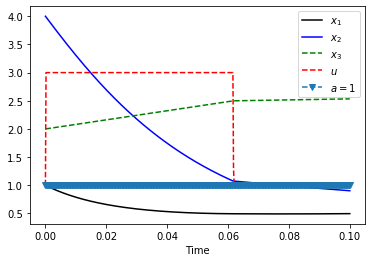

Final Time: 0.1


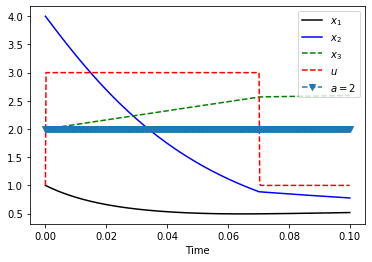

Final Time: 0.1


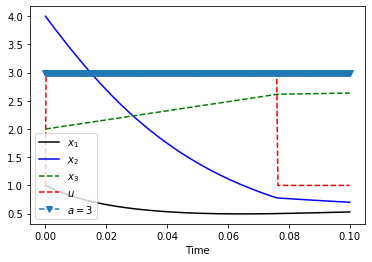

Final Time: 0.1


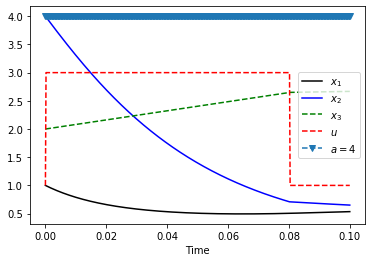

Final Time: 0.1


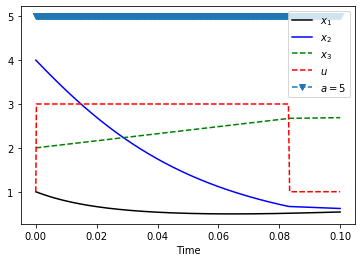

In [86]:
for a in [1,2,3,4,5]:  
    m = GEKKO(remote=False) # initialize GEKKO
    nt = 501
    penalty=1e5
    m.time = np.linspace(0.1,1,nt)

    # Variables
    x1 = m.Var(value=1.0)
    x2 = m.Var(value=4.0)
    x3 = m.Var(value=2.0)

    p = np.zeros(nt) # final time = 1
    p[-1] = 1.0
    final = m.Param(value=p)
    # optimize final time
    tf = m.FV(value=2.0,lb=0.1,ub=20.0)
    tf.STATUS = 1
    # control changes every time period
    u = m.MV(value=0,lb=1,ub=3)
    u.STATUS = 1
    m.Equation(x1.dt()==x1*(1-x2))
    m.Equation(x2.dt()==-x2*(u-x1))
    m.Equation(x3.dt()==tf*(u**2))
    m.Obj(2e3*tf+ penalty*(x1*final-a)**2+penalty*(x2*final-1)**2)

    m.options.IMODE = 6
    m.solve(disp=False)
    print('Final Time: ' + str(tf.value[0]))
    tm = np.linspace(0.,tf.value[0],nt)
    plt.figure(1)
    plt.plot(tm,x1.value,'k-',label=r'$x_1$')
    plt.plot(tm,x2.value,'b-',label=r'$x_2$')
    plt.plot(tm,x3.value,'g--',label=r'$x_3$')
    plt.plot(tm,u.value,'r--',label=r'$u$')
    plt.plot(tm,a*np.ones(len(tm)),'v--',label=r'$a=$'+str(a))
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.show()

**Commentaire**
En ajoutant le coût $L^2$, le contrôle de temps minimal ne tient pas en compte les contrainte d'état finale pour des valeurs de "a" grandes